In [8]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [9]:
fexp=np.loadtxt('exp_data.txt', skiprows=1, usecols=[0,1,2], unpack=True,
                   delimiter=',')
mater=lambda e: 249+1339*e**0.6939

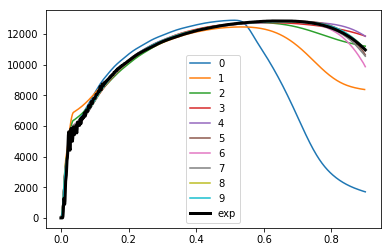

In [10]:
for i in range(10):
    try:
        f=np.loadtxt("f-step{}".format(i), skiprows=1, unpack=True)
        plt.plot(f[0], -2*np.pi*f[1], label=str(i))
    except:
        break
plt.plot(fexp[0], -2*np.pi*fexp[2], label='exp', lw=3, color='k')
plt.legend()

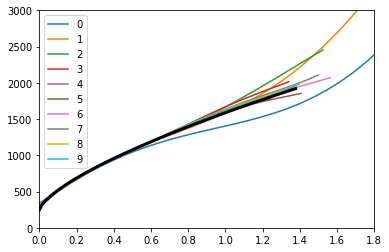

In [11]:
for i in range(10):
    try:
        c=np.loadtxt("curve{}".format(i), unpack=True, delimiter=',')
        plt.plot(c[0], c[1], label=str(i))
    except:
        break
plt.legend()
plt.ylim(0,3000)
plt.xlim(0,1.8)
plt.plot(np.linspace(0,1.377,100), mater(np.linspace(0,1.377,100)), lw=3, color='k')

Text(0,0.5,'напряжение, МПа')

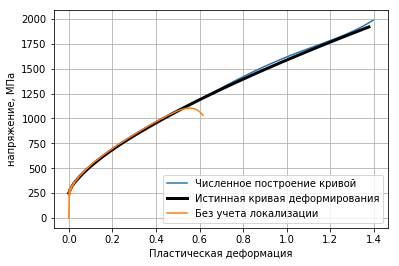

In [12]:
def integrate(y, x):
    rez=[0]
    for i in range(1,len(y)):
        rez.append(rez[-1]+0.5*(y[i]+y[i-1])*(x[i]-x[i-1]))
    return np.array(rez)  
def calcDiagr(expData, L0=10, D0=5):
    de=expData[1]/L0
    e=integrate(de, expData[0])
    s=expData[2]/np.pi/D0**2*4
    s=s*(1+e)
    e=np.log(1+e)
    return e,s
fexp[2]*=-2*np.pi
ee,ss = calcDiagr(fexp)
c=np.loadtxt("curve9".format(i), unpack=True, delimiter=',')
plt.plot(c[0], c[1], label='Численное построение кривой')
plt.plot(np.linspace(0,1.377,100), mater(np.linspace(0,1.377,100)), lw=3, color='k', label='Истинная кривая деформирования')
plt.plot(ee,ss, label='Без учета локализации')
plt.grid()
plt.legend()
plt.xlabel(u'Пластическая деформация')
plt.ylabel(u'напряжение, МПа')

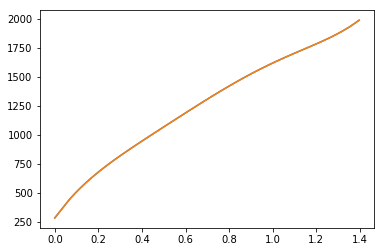

In [13]:
plt.plot(c[0], c[1])
p=np.polyfit(c[0],c[1],5)
def fitt(k, x):
    rez=[]
    n=len(k)
    for xx in x:
        rr=0
        for i, pp in enumerate(k):
            rr+=pp*xx**(n-i-1)
        rez.append(rr)
    return rez
plt.plot(c[0], fitt(p,c[0]))

In [14]:
len(p)

6